# About fonts in a nutshell

<hr>

2024 copyright DKRZ licensed under CC BY-NC-ND 4.0 (https://creativecommons.org/licenses/by-nc-nd/4.0/deed.en)

<hr>

**rcParam**

- font.family
- font.style
- font.variant
- font.stretch
- font.weight
- font.size

**CCS-based generic-family aliases**

- 'cursive'
- 'fantasy'
- 'monospace'
- 'sans'
- {'sans serif', 'sans-serif', 'serif'}

<br>

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patheffects as path_effects

## List all available fonts

In [2]:
fonts = mpl.font_manager.get_font_names()

#search_font = 'Courier'
#search_font = 'Helvetica'
search_font = 'Comic'
search_font = 'Armen'

print([s for s in fonts if search_font in s])

['.SF Armenian', '.SF Armenian Rounded', 'Noto Sans Armenian']


### Default font settings

https://matplotlib.org/stable/api/font_manager_api.html#matplotlib.font_manager.FontProperties

In [3]:
print('Font name:               ', mpl.font_manager.FontProperties().get_name())
print('Font family:             ', mpl.font_manager.FontProperties().get_family()) #-- same as mpl.rcParams['font.family']
print('Font size:               ', mpl.font_manager.FontProperties().get_size())
print('Font size pts:           ', mpl.font_manager.FontProperties().get_size_in_points())
print('Font style:              ', mpl.font_manager.FontProperties().get_style())
print('Font weight:             ', mpl.font_manager.FontProperties().get_weight())
print('Font variant:            ', mpl.font_manager.FontProperties().get_variant())
print('Font stretch:            ', mpl.font_manager.FontProperties().get_stretch())
print('Font slant:              ', mpl.font_manager.FontProperties().get_slant())
print('Font math font family:   ', mpl.font_manager.FontProperties().get_math_fontfamily())
print('Font file:               ',
       mpl.font_manager.findfont(mpl.font_manager.FontProperties(family=mpl.rcParams['font.family'])))
print('Font fontconfig pattern: ', 
       mpl.font_manager.FontProperties().get_fontconfig_pattern())


Font name:                DejaVu Sans
Font family:              ['sans-serif']
Font size:                10.0
Font size pts:            10.0
Font style:               normal
Font weight:              normal
Font variant:             normal
Font stretch:             normal
Font slant:               normal
Font math font family:    dejavusans
Font file:                /Users/k204045/miniforge3/envs/cartopy2/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf
Font fontconfig pattern:  sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0


### Default font DejaVu

Use the default font settings to draw a string.

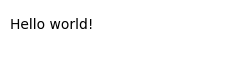

In [4]:
fig, ax = plt.subplots(figsize=(2,0.5))
ax.set_axis_off()

text = ax.text(0.1, 0.5, 'Hello world!', ha='right')

## Font fallback

If you want to mix some different characters that are not covered by only one font you can use the 'font fallback'. This means that Matplotlib trys to get the correct characters or glyphs from a list of given fonts. <br>
The string Հայոց լեզու in the following example is Armenian and means 'Armenian language'.

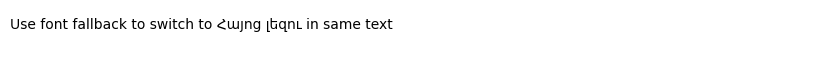

In [5]:
fig, ax = plt.subplots(figsize=(6,0.5))
ax.set_axis_off()

text = ax.text(0.1, 0.5, 
               'Use font fallback to switch to Հայոց լեզու in same text',
               family=['DejaVu Sans', 
                       '.SF Armenian', 
                       '.SF Armenian Rounded'],
               ha='right')

## Use fontdict

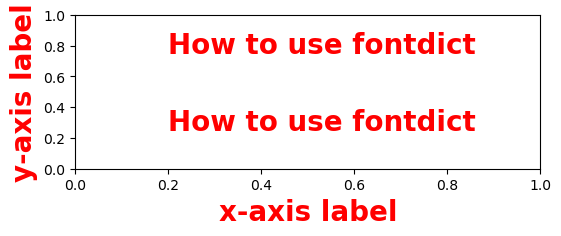

In [6]:
font_settings = dict(size=20, color='red', family='sans-serif', weight='bold')

fig, ax = plt.subplots(figsize=(6,2))

ax.text(0.2, 0.25, 'How to use fontdict', fontdict=font_settings)
ax.text(0.2, 0.75, 'How to use fontdict', **font_settings)

ax.set_xlabel('x-axis label', **font_settings)
ax.set_ylabel('y-axis label', **font_settings);

## Change the font

**Note:** <br>
Changing the Matplotlib resource parameters (`mpl.rcParams`) will affect the notebook. It is not always possible to 'reset' the mpl.rcParams['font.sans-serif'] to the default values. Then the  Notebook kernel must be restarted to load the changed resources. So, if the font changes or anything else might not give the correct result, restart the kernel and run the code cells up to the current code cell.

...


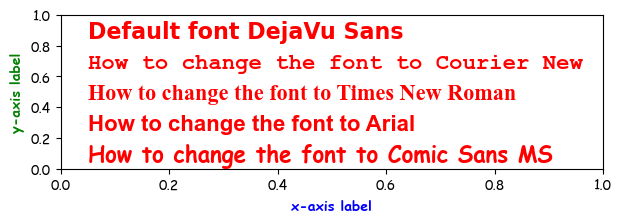

In [7]:
#-- choose whether to use or change the default font setting 
#-- for the text, title, and labels
use_defaults=True

if not use_defaults:
    print('... change defaults ...')
    #-- Make general changes to the rcParams defaults, this is 
    #-- temporarily used but will affect all following code cells. 
    #mpl.rcParams['text.usetex'] = False
    #mpl.rcParams['font.family'] = 'sans-serif' 
    mpl.rcParams['font.sans-serif'] = 'Comic Sans MS'
else:
    mpl.rcParams['font.sans-serif'] = 'DejaVu Sans'
    
fig, ax = plt.subplots(figsize=(7,2))

fontdict = dict(size=16, color='red', family='sans-serif', weight='bold')

ax.text(0.05, 0.05, 'How to change the font to Comic Sans MS', 
        fontname='Comic Sans MS', fontdict=fontdict)
ax.text(0.05, 0.25, 'How to change the font to Arial', 
        fontname='Arial', fontdict=fontdict)
ax.text(0.05, 0.45, 'How to change the font to Times New Roman', 
        fontname='Times New Roman', fontdict=fontdict)
ax.text(0.05, 0.65, 'How to change the font to Courier New', 
        fontname='Courier New', fontdict=fontdict)
ax.text(0.05, 0.85, 'Default font DejaVu Sans', fontdict=fontdict)

#-- use default font but change the font for the axis ticks and labels
if use_defaults:
    print('...')
    #-- change the axis tick value font
    for tick in ax.get_xticklabels():
        tick.set_fontname('Comic Sans MS')
    for tick in ax.get_yticklabels():
        tick.set_fontname('Comic Sans MS')
    #-- set font name
    labelfontdict = dict(name='Comic Sans MS')
else:
    labelfontdict = {}
    
ax.set_xlabel('x-axis label', color='blue', weight='bold', **labelfontdict)
ax.set_ylabel('y-axis label', color='green', weight='bold', **labelfontdict);

... change defaults ...


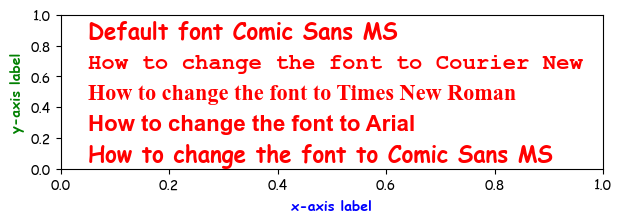

In [8]:
#-- reset to defaults
mpl.rc_file_defaults()

#-- choose whether to use or change the default font setting 
#-- for the text, title, and labels
use_defaults = False

if not use_defaults:
    print('... change defaults ...')
    mpl.rcParams['font.family'] = 'Comic Sans MS'
    
    fig, ax = plt.subplots(figsize=(7,2))
    #-- don't use family='sans-serif' in fontdict for COMIC Sans MS
    fontdict = dict(size=16, color='red', weight='bold')
    ax.text(0.05, 0.05, 'How to change the font to Comic Sans MS', 
            fontname='Comic Sans MS', fontdict=fontdict)
    ax.text(0.05, 0.25, 'How to change the font to Arial', 
            fontname='Arial', fontdict=fontdict)
    ax.text(0.05, 0.45, 'How to change the font to Times New Roman', 
            fontname='Times New Roman', fontdict=fontdict)
    ax.text(0.05, 0.65, 'How to change the font to Courier New', 
            fontname='Courier New', fontdict=fontdict)
    ax.text(0.05, 0.85, 'Default font Comic Sans MS', fontdict=fontdict)
    labelfontdict = {}
    ax.set_xlabel('x-axis label', color='blue', weight='bold', **labelfontdict)
    ax.set_ylabel('y-axis label', color='green', weight='bold', **labelfontdict);
else:
    print('... use defaults ...')
    #mpl.rcdefaults()
    #mpl.style.use('default')
    mpl.rc_file_defaults()
    
    fig, ax = plt.subplots(figsize=(7,2))
    
    fontdict = dict(size=16, color='red', family='sans-serif', weight='bold')
    ax.text(0.05, 0.05, 'How to change the font to Comic Sans MS', 
            fontname='Comic Sans MS', fontdict=fontdict)
    ax.text(0.05, 0.25, 'How to change the font to Arial', 
            fontname='Arial', fontdict=fontdict)
    ax.text(0.05, 0.45, 'How to change the font to Times New Roman', 
            fontname='Times New Roman', fontdict=fontdict)
    ax.text(0.05, 0.65, 'How to change the font to Courier New', 
            fontname='Courier New', fontdict=fontdict)
    ax.text(0.05, 0.85, 'Default font DejaVu Sans', fontdict=fontdict)

    labelfontdict = {}
    ax.set_xlabel('x-axis label', color='blue', weight='bold', **labelfontdict)
    ax.set_ylabel('y-axis label', color='green', weight='bold', **labelfontdict);

## Reset to default font

In [9]:
mpl.rc_file_defaults()

## Change the automatic 'offset text'

Matplotlib automatically change the scale of the y-axis values (auto-scaled graph) and displays the exponential notation at the upper-left corner of the plot. 

Change the default offset value notation at the upper-left corner.

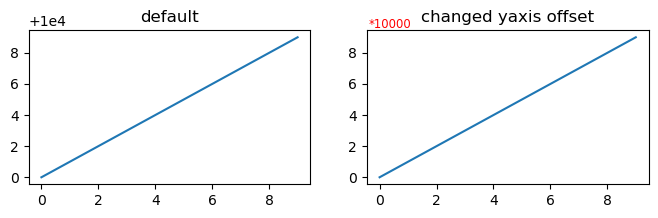

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2))

y = 10000
data = [y + i for i in range(10)]

#-- left axis
ax1.plot(data)
ax1.set_title('default')

#-- right axis
ax2.plot(data)
ax2.set_title('changed yaxis offset')

ax2.yaxis.offsetText.set_visible(False)
ax2.text(-0.4, max(data)+0.6, f'*{y:{len(str(y))}.0f}', color='r', size='small');

Change the format of the offset notation and add it to the y-axis label. To do this you have to change the formatter and redraw the figure canvas to update the auto-scale graph.

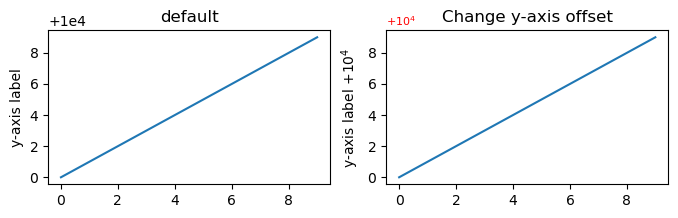

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,2))

y = 10000
data = [y + i for i in range(10)]

#-- left plot
ax1.plot(data)
ax1.set_title('default')
ax1.set_ylabel('y-axis label')

#-- right plot
ax2.plot(data)
ax2.set_title('Change y-axis offset')

#-- change formatter and update the axis by re-draw the canvas
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))
ax2.yaxis.set_major_formatter(formatter)
fig.canvas.draw()
#-- change font size and color of the offset text
ax2.yaxis.get_offset_text().set_fontsize(8)
ax2.yaxis.get_offset_text().set_color('red')

#-- get the y-axis offset text and append it to the ylabel
offset = ax2.yaxis.get_major_formatter().get_offset()
ax2.set_ylabel('y-axis label '+offset);

## Mixed font sizes

```text
LaTex font sizes:
    \tiny             \normalsize     \huge
    \scriptsize       \large          \Huge
    \footnotesize     \Large
    \small            \LARGE
```
If the LaTeX notation is not rendered correctly re-run the code cell a second time to make sure the `mpl.rcParams['text.usetex'] = True` works as expected. This is a typical LaTeX interpreter behavior.

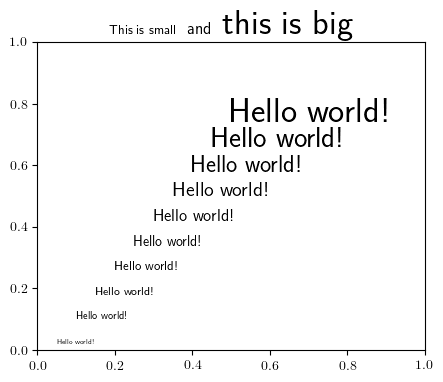

In [12]:
mpl.rcParams['text.usetex'] = True

fig, ax = plt.subplots(figsize=(5,4))

ax.set_title(r'{\small{This is small}} \ and \  {\Huge{this is big}}')

sizes = ['\\tiny', '\\scriptsize', '\\footnotesize', '\\small', 
         '\\normalsize', '\\large', '\\Large', '\\LARGE',  
         '\\huge', '\\Huge']

for i,fs in enumerate(sizes):
    ax.text(0.05+(0.05*i), 0.02+(0.08*i), r'{}'.format(fs +' '+ 'Hello world!'));

## Try to change the font type of the axis tick labels

**Note:** There is just a small set of fonts available for LaTeX in Matplotlib!

Serif:<br>
- Computer Modern Roman
- Palatino (mathpazo)
- Times (mathptmx)
- Bookman (bookman)
- New Century Schoolbook (newcent)
- Charter (charter)

Sans-serif:<br>
- Computer Modern Serif
- Helvetica (helvet)
- Avant Garde (avant)

Cursive:<br>
- Zapf Chancery (chancery)

Monospace:<br>
- Computer Modern Typewriter, Courier (courier)

https://matplotlib.org/stable/users/explain/text/usetex.html


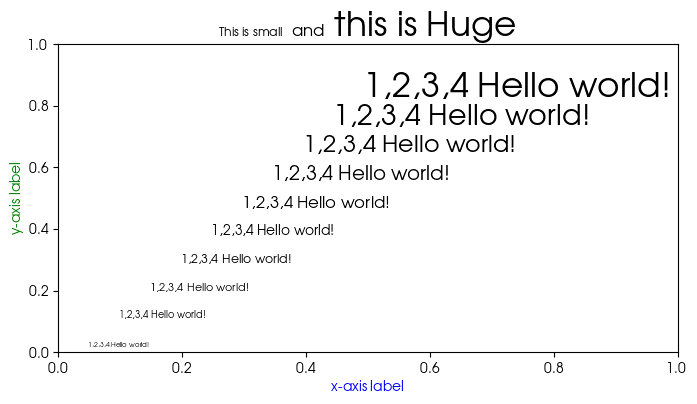

In [13]:
new_font = 'Avant Garde'

#-- set resource params
#-- LateX settings
mpl.rcParams['text.usetex'] = True

#-- add sans-serif fonts for math-text; single or multiple fonts
#mpl.rcParams['text.latex.preamble'] = r'\usepackage{sfmath}'
mpl.rc('text.latex', preamble=r'\usepackage{sfmath} \usepackage{amsmath}')

#-- font settings
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = new_font

#-- create the figure
fig, ax = plt.subplots(figsize=(8,4))

ax.set_title(r'{\small{This is small}} \ and \  {\Huge{this is Huge}}');

#-- font sizes
sizes = ['\\tiny', '\\scriptsize', '\\footnotesize', '\\small', 
         '\\normalsize', '\\large', '\\Large', '\\LARGE',  
         '\\huge', '\\Huge']

#-- write increasing string
for i,fs in enumerate(sizes):
    ax.text(0.05+(0.05*i), 0.02+(0.09*i), r'{}'.format(fs +' '+ '1,2,3,4 Hello world!'))

#-- tick values font
for tick in ax.get_xticklabels():
    tick.set_fontfamily('sans-serif')
    tick.set_fontname(new_font)
for tick in ax.get_yticklabels():
    tick.set_fontfamily('sans-serif')
    tick.set_fontname(new_font)

#-- axis labels font
labelfontdict = {}
ax.set_xlabel('x-axis label', color='blue', weight='bold', **labelfontdict)
ax.set_ylabel('y-axis label', color='green', weight='bold', **labelfontdict);

List all Matplotlib resource settings from .matplotlibrc and its changes.

In [14]:
#mpl.rcParams

**Note:** The following example demonstrates how to get the position and labels of the axis ticks.

In [15]:
x,y = ax.get_xticklabels()[0].get_position()
print(x,y)
text = ax.get_xticklabels()[0].get_text()
print(text)

0.0 0
$\mathdefault{0.0}$


In [16]:
#help(ax.get_xticklabels()[0])

## Accents and "Umlaute"

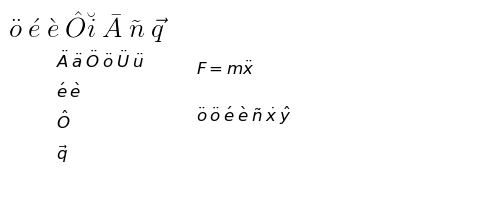

In [17]:
fig, ax = plt.subplots(figsize=(6,2))
ax.set_axis_off()

mpl.rc_file_defaults()
mpl.rcParams['text.usetex'] = False

uml      = r'$\ddot{A}  \: \ddot{a}  \: \ddot{O}  \: \ddot{o}  \: \ddot{U}  \: \ddot{u} $'
acute    = r'$\acute{e}  \: \grave{e} $'
arrow_up = r'$\hat{O} $'
vector   = r'$\vec{q} $'

size = 12

ax.text(0.1, 0.85, uml, fontsize=size)
ax.text(0.1, 0.65, acute, fontsize=size)
ax.text(0.1, 0.45, arrow_up, fontsize=size)
ax.text(0.1, 0.25, vector, fontsize=size)

ax.set_title(r'$\ddot{o} \: \acute{e}  \:  \grave{e}  \:  \hat{O} '
             r'\breve{i}  \:  \bar{A}  \:  \tilde{n}  \:  \vec{q} $', 
             loc='left', fontsize=20)

#-- shortkeys (not really better readable)
ax.text(0.4, 0.8, r"$F=m\ddot{x}$", fontsize=size)
ax.text(0.4, 0.5, r'''$\"o \: \ddot o \: \'e \: \`e \: \~n \: \.x \: \^y$''', 
        fontsize=size);

## Font demo (Matplotlib)

https://matplotlib.org/stable/gallery/text_labels_and_annotations/fonts_demo.html#sphx-glr-gallery-text-labels-and-annotations-fonts-demo-py

## Background text box - bbox

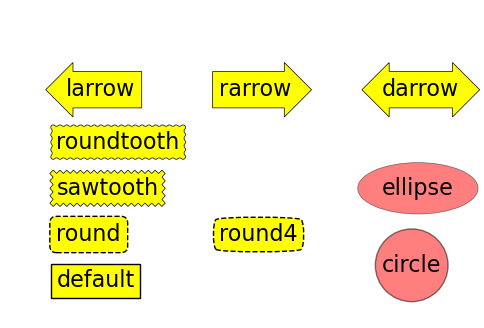

In [18]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_axis_off()
ax.grid()

#-- square (default) box
txbox_kw = dict(facecolor='yellow', edgecolor='black')
text = ax.text(0.1, 0.1, 'default', fontsize=16, bbox=txbox_kw)

#-- round box
txbox_kw.update(dict(boxstyle='round', linewidth=1, linestyle='--'))
text = ax.text(0.1, 0.25, 'round', fontsize=16, bbox=txbox_kw)

#-- sawtooth box
txbox_kw.update(dict(boxstyle='sawtooth', linewidth=0.5, linestyle='-'))
text = ax.text(0.1, 0.4, 'sawtooth', fontsize=16, bbox=txbox_kw)

#-- roundtooth box
txbox_kw.update(dict(boxstyle='roundtooth', linewidth=0.5, linestyle='-'))
text = ax.text(0.1, 0.55, 'roundtooth', fontsize=16, bbox=txbox_kw)

#-- larrow, rarrow, darrow
txbox_kw.update(dict(boxstyle='larrow', linewidth=0.5, linestyle='-'))
text = ax.text(0.12, 0.72, 'larrow', fontsize=16, bbox=txbox_kw)
txbox_kw.update(dict(boxstyle='rarrow'))
text = ax.text(0.45, 0.72, 'rarrow', fontsize=16, bbox=txbox_kw)
txbox_kw.update(dict(boxstyle='darrow'))
text = ax.text(0.8, 0.72, 'darrow', fontsize=16, bbox=txbox_kw)

#-- round box
txbox_kw.update(dict(boxstyle='round4', linewidth=1, linestyle='--'))
text = ax.text(0.45, 0.25, 'round4', fontsize=16, bbox=txbox_kw)

#-- circle box
txbox_kw.update(dict(boxstyle='circle', linewidth=1, linestyle='-', facecolor='red', alpha=0.5))
text = ax.text(0.8, 0.15, 'circle', fontsize=16, bbox=txbox_kw)

#-- ellipse box
txbox_kw.update(dict(boxstyle='ellipse', linewidth=0.5, linestyle='-'))
text = ax.text(0.8, 0.4, 'ellipse', fontsize=16, bbox=txbox_kw)


## Math equations

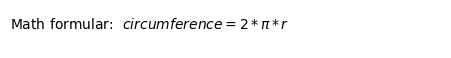

In [19]:
fig, ax = plt.subplots(figsize=(2,0.5))
ax.set_axis_off()

text = ax.text(0.02, 0.5, r'Math formular:  $circumference = 2*\pi*r$', ha='right')

## Artists

### Path effects

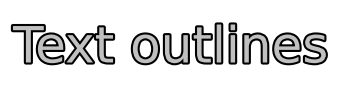

In [20]:
fig, ax = plt.subplots(figsize=(2,1))
ax.set_axis_off()

text = ax.text(0.02, 0.5, 'Text outlines', color='silver', fontsize=36, va='center')

text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'),
                       path_effects.Normal()])

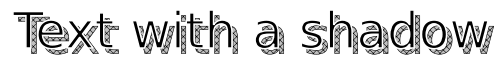

In [21]:
fig, ax = plt.subplots(figsize=(2,0.5))
ax.set_axis_off()

text = ax.text(0.02, 0.5, 'Text with a shadow', fontsize=36, va='center')

text.set_path_effects([path_effects.PathPatchEffect(offset=(4, -4), 
                                                    hatch='xxxxx', 
                                                    linewidth=0.4,
                                                    facecolor='silver'), 
                       path_effects.PathPatchEffect(edgecolor='white', 
                                                    linewidth=1.1, 
                                                    facecolor='black')])
#- change the hatches linewidth
mpl.rcParams['hatch.linewidth'] = 0.4

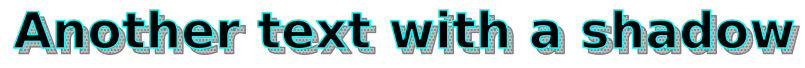

In [22]:
fig, ax = plt.subplots(figsize=(2,0.5))
ax.set_axis_off()

text = ax.text(0.02, 0.5, 'Another text with a shadow', fontsize=36, va='center', weight='bold')

text.set_path_effects([path_effects.PathPatchEffect(offset=(4, -4), 
                                                    hatch='.....', 
                                                    edgecolor='grey',
                                                    facecolor='silver'), 
                       path_effects.PathPatchEffect(linewidth=1.1,
                                                    edgecolor='cyan',
                                                    facecolor='black')])

#- change the hatches linewidth
mpl.rcParams['hatch.linewidth'] = 1.


### Circular annotations

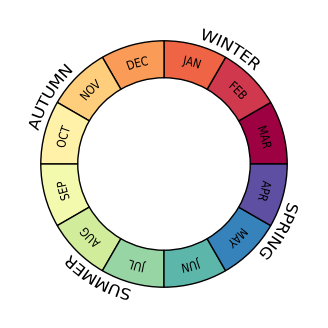

In [23]:
from matplotlib.textpath import TextPath
from matplotlib.patches import PathPatch

#mpl.rc_file_defaults()

#-- annotate the pie chart sections (pie slice)
def add_pie_slice_text(text, angle, radius=1, scale=0.01, y=0.):
    text_path = TextPath((0, 0), text, size=10)
    text_path.vertices.flags.writeable = True
    vertices = text_path.vertices
    
    xmin, xmax = vertices[:, 0].min(), vertices[:, 0].max()
    ymin, ymax = vertices[:, 1].min(), vertices[:, 1].max()
    
    vertices -= (xmin+xmax)/2, (ymin+ymax)/2
    vertices *= scale
    
    for i in range(len(vertices)):
        theta = angle - vertices[i, 0]
        vertices[i, 0] = (radius-y + vertices[i, 1]) * np.cos(theta)
        vertices[i, 1] = (radius-y + vertices[i, 1]) * np.sin(theta)
        
    patch = PathPatch(text_path, facecolor='k', linewidth=0)
    ax.add_artist(patch)

#-- create the figure and axis
fig, ax = plt.subplots(figsize=(4,4))
ax.set_aspect(1.0)

#-- Choose 12 colors from Spectral colormap
colors = mpl.cm.Spectral(np.linspace(0, 1, 12))
#colors[:,3] = 0.5   #-- increase transparency

#-- draw pie chart (circular band with 12 sections),
#-- set size of the circular band width of the pie chart
size = 0.3   
ax.pie(np.ones(12), radius=1, colors=colors, 
       wedgeprops=dict(width=size, edgecolor='black'))

#-- add annotations
text_list = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
             'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
for i in range(12):
    add_pie_slice_text(text_list[i], angle=(2.5-i)*2*np.pi/12, radius=1-0.5*size, y=0.)

seasons = ['SPRING','SUMMER','AUTUMN','WINTER']
for i in range(len(seasons)):
    add_pie_slice_text(seasons[i], angle=(11.-i*3)*2*np.pi/12,
                       radius=1+size, scale=0.0125, y=0.2)